**FINAL DATABASE**

This notebook is for handlign the final database. The idea is to clean and produce the final dataset ready to be handled for another programa like R or SPSSS. Also, we can include in this code a first example of analysys and visualizations of the data. In this notebook we are going to use PANDAS, MATPLOT, NUMPY and SEABORN. also, becasue our data has different shapes (string, numers, etc.) we are going to use io (I/O) to handle the inputs and outputs of this different data to clean the final database.

**Structure:**

Setup: Imports libraries.

analyze_debate_data Function: This is the core function of the notebook and performs a multi-step analysis:

Data exploration: Loads the final dataset, displays its shape, column names, data types, and missing value counts. A statistical summary (.describe()) is also generated.

Date: We encounter a problem on how Synthesio manages the date in the original files. We use this fucntion to clean Date and Time columns to create a proper datetime object and extracts the Hour for time-based analysis. It also standardizes the predicted_polarization_level as an ordered categorical variable.

Correlation Analysis: Creates and displays a heatmap of the correlation matrix for key numerical variables, including VADER scores and potential reach.

Visualization Annex: Generates a series of plots to answer some basic questions:

A bar chart showing Tweet Volume by Hour.

A bar chart showing the Distribution of Predicted Polarization Levels.

A box plot showing the relationship between Sentiment Score and Polarization Level.

A bar chart showing the Overall Sentiment Distribution from the original Synthesio labels.

Execution: The analyze_debate_data function is called with the path to the final dataset.



In [1]:
import pandas as pd

# Load df
df = pd.read_csv("data/processed/debate_tweets_with_polarization_and_sentiment.csv", low_memory=False)

# Prepare an empty summary list
summary = []

# Loop through each column to extract insights
for col in df.columns:
    data = df[col]
    col_summary = {
        "Column": col,
        "Type": data.dtype,
        "Missing Values": data.isna().sum(),
        "Unique Values": data.nunique(),
    }

    if pd.api.types.is_numeric_dtype(data):
        col_summary.update({
            "Mean": data.mean(),
            "Std": data.std(),
            "Min": data.min(),
            "Max": data.max(),
        })
    elif pd.api.types.is_object_dtype(data) or pd.api.types.is_categorical_dtype(data):
        col_summary.update({
            "Top Value": data.mode().iloc[0] if not data.mode().empty else None,
            "Top Freq": data.value_counts().iloc[0] if not data.value_counts().empty else None
        })

    summary.append(col_summary)

# Convert to df for a clean table
summary_df = pd.DataFrame(summary)

# Display the full summary
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)
print(summary_df)

                            Column     Type  Missing Values  Unique Values  \
0                               Id    int64               0        2238712   
1                             Date   object               0              3   
2                             Time   object               0            276   
3                       Media Type   object               0              2   
4                      Site Domain   object               0              1   
5                      Mention URL   object               0        2238712   
6                   Publisher Name   object              86         321977   
7               Publisher Username   object               0         370212   
8                            title   object               0         265600   
9                  Mention Content   object               1         265599   
10                          Topics   object               1              2   
11                       Subtopics  float64         2238712     

Loading Data
Data loaded successfully.
Original shape: (2238712, 34)

 Step: Preliminary Data Exploration

First 5 rows of the dataset:
             Id        Date                Time Media Type  \
0  281380390449  2024-06-27  22:30:00 -0500 CDT    Twitter   
1  281380386657  2024-06-27  22:30:00 -0500 CDT    Twitter   
2  281380349903  2024-06-27  22:30:00 -0500 CDT    Twitter   
3  281380357944  2024-06-27  22:30:00 -0500 CDT    Twitter   
4  281380399438  2024-06-27  22:30:00 -0500 CDT    Twitter   

              Site Domain                                        Mention URL  \
0  http://www.twitter.com  http://twitter.com/LouisianaCRs/status/1806530...   
1  http://www.twitter.com  http://twitter.com/barneystoneage/status/18065...   
2  http://www.twitter.com  http://twitter.com/unusual_doge/status/1806530...   
3  http://www.twitter.com  http://twitter.com/KeepingUPosted/status/18065...   
4  http://www.twitter.com  http://twitter.com/SteveKaye/status/1806530646...   

          

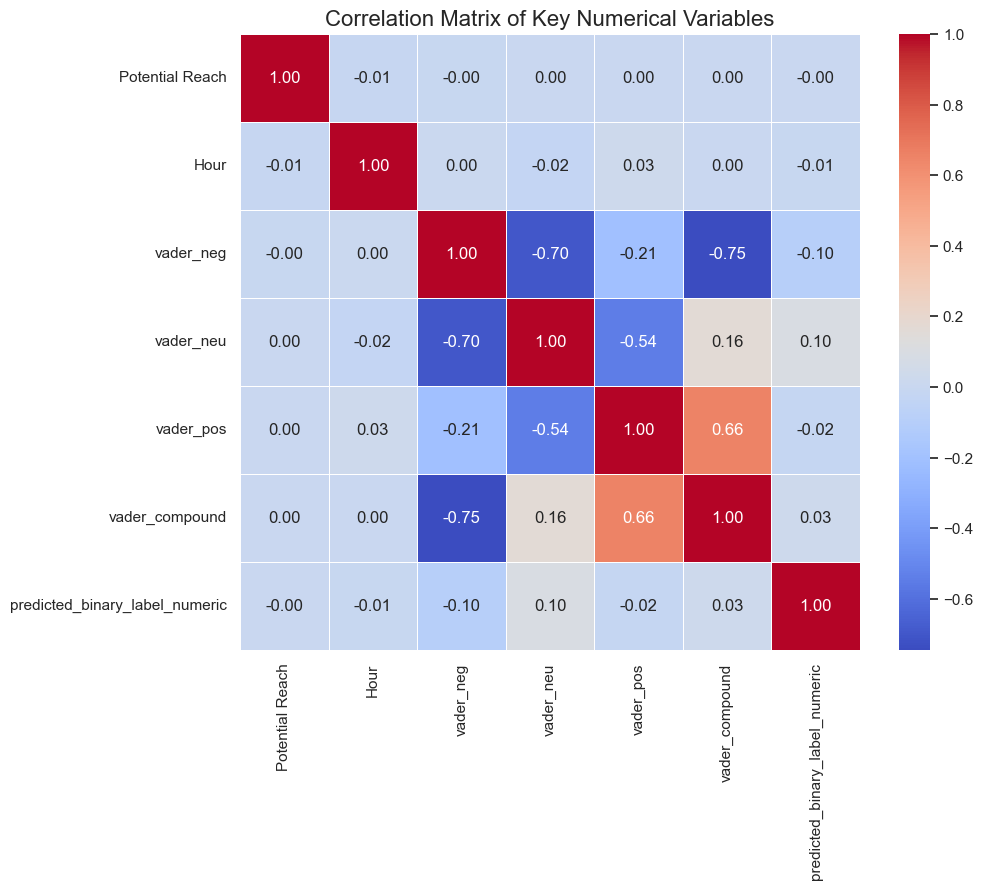


 Step 3: Visualization Annex


/var/folders/8x/qy8j1cyj36jd9vpnlk90r0hh0000gn/T/ipykernel_93120/1421362915.py:119: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Hour', data=df, palette='magma')


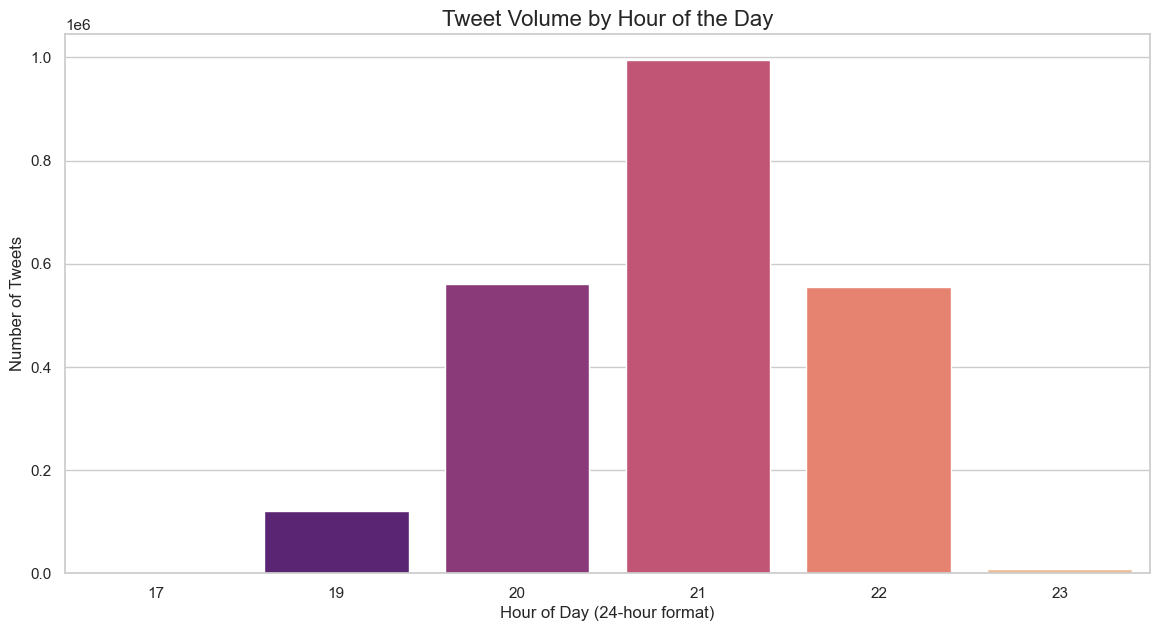

/var/folders/8x/qy8j1cyj36jd9vpnlk90r0hh0000gn/T/ipykernel_93120/1421362915.py:128: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='predicted_polarization_level', data=df, order=polarization_order + ['Unknown'], palette='plasma')


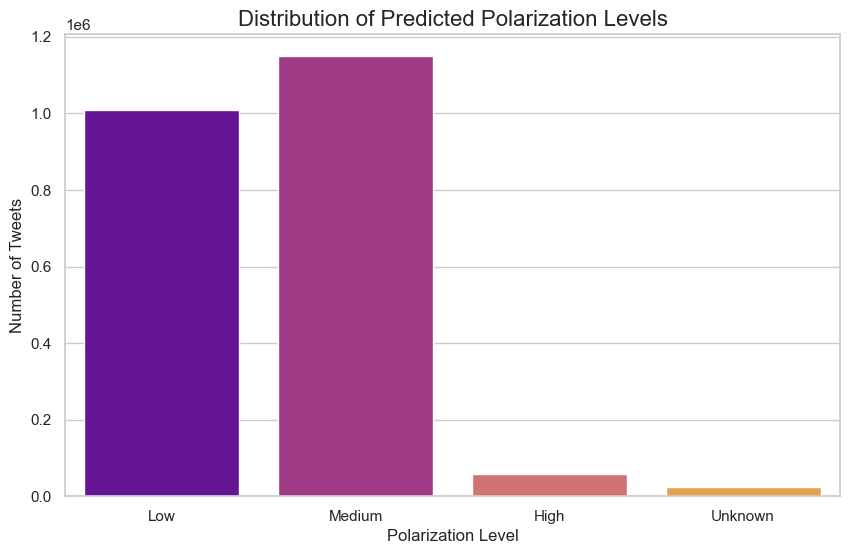

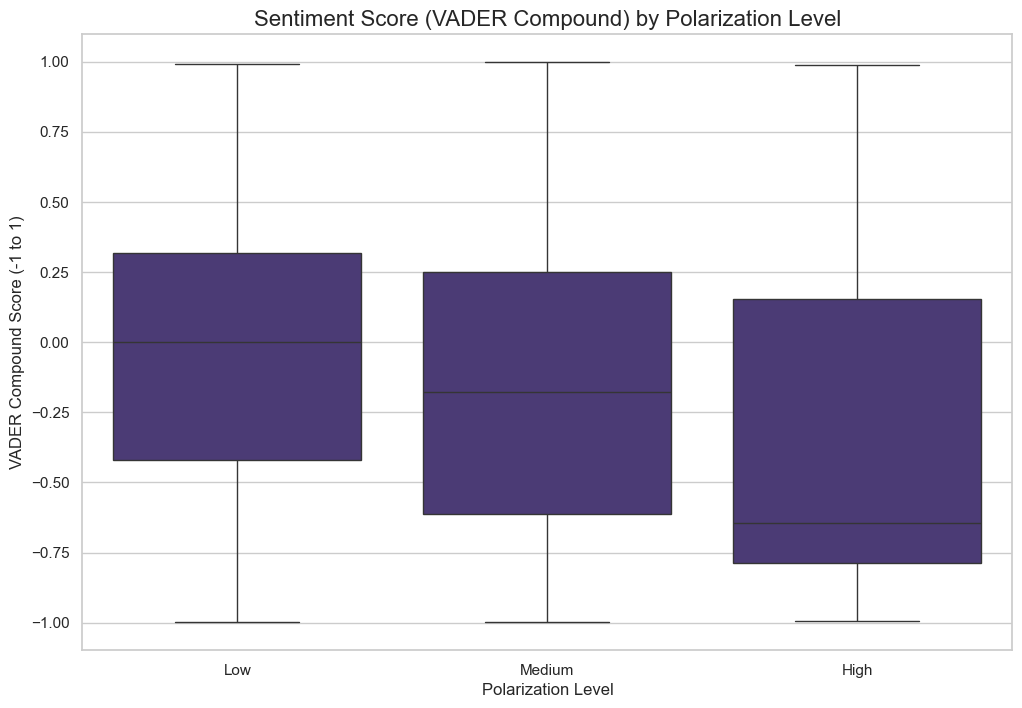

/var/folders/8x/qy8j1cyj36jd9vpnlk90r0hh0000gn/T/ipykernel_93120/1421362915.py:156: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=df, order=[s for s in sentiment_order if s in df['Sentiment'].unique()], palette='viridis')


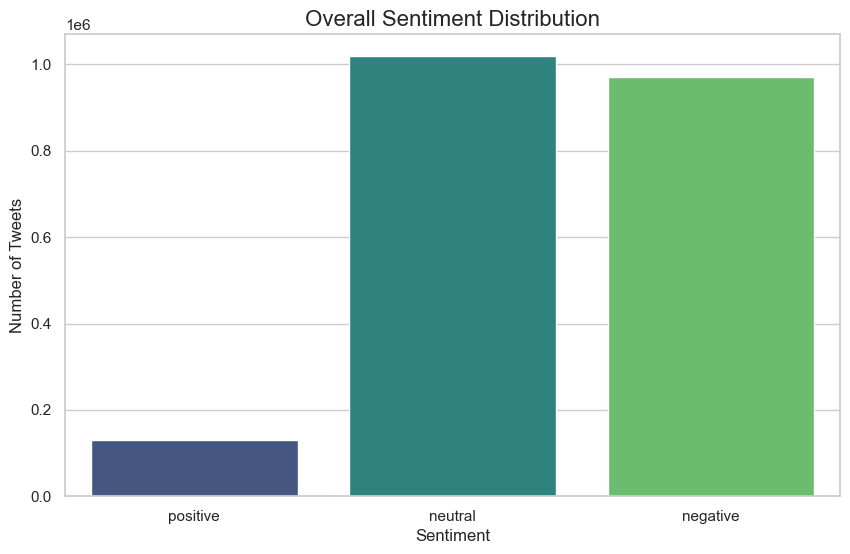


 Analysis and Visualization Complete.


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import io

# Configuration 
# Set styling for all plots
sns.set_theme(style="whitegrid", palette="viridis")
plt.rcParams['figure.figsize'] = (12, 7)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 12

def analyze_debate_data(filepath):
    
    try:
        print("Loading Data")
        df = pd.read_csv(filepath, low_memory=False)
        print("Data loaded successfully.")
        print(f"Original shape: {df.shape}")
    except FileNotFoundError:
        print(f"ERROR: File not found at '{filepath}'. Please check the path.")
        return

    # Step: Preliminary Data Exploration
    print("\n Step: Preliminary Data Exploration")
    print("\nFirst 5 rows of the dataset:")
    print(df.head())

    print("\nData types and non-null counts:")
    # Use a buffer in I/O to get the output of df.info() as a string to print
    buffer = io.StringIO()
    df.info(buf=buffer)
    info_str = buffer.getvalue()
    print(info_str)

    print("\nCount of missing values per column:")
    print(df.isnull().sum())

    print("\nStatistical summary of numerical columns:")
    print(df.describe())


    # Step 1: Data Cleaning and Feature Engineering
    print("\n Step 1: Cleaning Data and Engineering Features")

    # 1.1. Clean Time and Date Columns. This because the orignal data of Synthesio handle this as a string.
    print("Cleaning 'Date' and creating 'Time' columns")
    # Check if 'Time' column exists before processing
    if 'Time' in df.columns and 'Date' in df.columns:
        df['Time_clean'] = df['Time'].str.extract(r'(\d{2}:\d{2}:\d{2})')
        # Convert to string type before concatenation to prevent TypeError
        df['datetime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time_clean'].astype(str), errors='coerce')
        df['Hour'] = df['datetime'].dt.hour
    else:
        print("Warning: 'Date' or 'Time' column not found. Skipping time-based analysis.")
        df['Hour'] = 0 # Create a dummy hour column if not present
    
    # 1.2. Clean and Standardize Categorical Data
    print("Standardizing categorical columns.")
    # Convert polarization level to an ordered categorical type for plots
    polarization_order = ['Low', 'Medium', 'High']
    if 'predicted_polarization_level' in df.columns:
        # Add 'Unknown' to the list of categories when creating the Categorical type to handle missing values.
        all_categories = polarization_order + ['Unknown']
        
        df['predicted_polarization_level'] = pd.Categorical(
            df['predicted_polarization_level'],
            categories=all_categories,
            ordered=True
        )
        # Now this fillna operation will work because 'Unknown' is a valid category.
        df['predicted_polarization_level'] = df['predicted_polarization_level'].fillna('Unknown')
    else:
        print("Warning: 'predicted_polarization_level' not found.")


    # 1.3. Select and Clean Numerical Columns for Analysis
    print("Selecting and cleaning key numerical columns.")
    numerical_cols = [
        'Potential Reach', 'Hour', 'vader_neg', 'vader_neu',
        'vader_pos', 'vader_compound', 'predicted_binary_label_numeric'
    ]
    
    # Filter list to only include columns that actually exist in the DataFrame
    existing_numerical_cols = [col for col in numerical_cols if col in df.columns]
    
    # Fill missing numerical values with 0 (assuming NaN means no reach/interaction)
    for col in existing_numerical_cols:
        df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

    print("Data cleaning complete.")


    # Step 2. Correlation Analysis
    print("\n Step 2: Correlation Analysis ")
    if existing_numerical_cols:
        corr_matrix = df[existing_numerical_cols].corr()

        plt.figure(figsize=(10, 8))
        sns.heatmap(
            corr_matrix,
            annot=True,
            fmt=".2f",
            cmap='coolwarm',
            linewidths=.5
        )
        plt.title('Correlation Matrix of Key Numerical Variables')
        plt.show()
    else:
        print("No numerical columns found for correlation analysis.")


    # Step 3. Visualization Annex
    print("\n Step 3: Visualization Annex")

    # Plot 1: Tweet Volume by Hour
    if 'Hour' in df.columns and df['Hour'].nunique() > 1:
        plt.figure(figsize=(14, 7))
        sns.countplot(x='Hour', data=df, palette='magma')
        plt.title('Tweet Volume by Hour of the Day')
        plt.xlabel('Hour of Day (24-hour format)')
        plt.ylabel('Number of Tweets')
        plt.show()

    # Plot 2: Distribution of Predicted Polarization Levels
    if 'predicted_polarization_level' in df.columns:
        plt.figure(figsize=(10, 6))
        sns.countplot(x='predicted_polarization_level', data=df, order=polarization_order + ['Unknown'], palette='plasma')
        plt.title('Distribution of Predicted Polarization Levels')
        plt.xlabel('Polarization Level')
        plt.ylabel('Number of Tweets')
        plt.show()

    # Plot 3: VADER Compound Sentiment Score by Polarization Level
    if 'predicted_polarization_level' in df.columns and 'vader_compound' in df.columns:
        plt.figure(figsize=(12, 8))
        sns.boxplot(
            x='predicted_polarization_level',
            y='vader_compound',
            data=df,
            order=polarization_order
        )
        plt.title('Sentiment Score (VADER Compound) by Polarization Level')
        plt.xlabel('Polarization Level')
        plt.ylabel('VADER Compound Score (-1 to 1)')
        plt.show()
    
    # Plot 4: Distribution of Sentiment
    if 'Sentiment' in df.columns:
        plt.figure(figsize=(10, 6))
        # Dynamically get the order from the data if possible
        sentiment_order = ['positive', 'neutral', 'negative']
        if df['Sentiment'].dtype == 'category':
            sentiment_order = df['Sentiment'].cat.categories.tolist()
        
        sns.countplot(x='Sentiment', data=df, order=[s for s in sentiment_order if s in df['Sentiment'].unique()], palette='viridis')
        plt.title('Overall Sentiment Distribution')
        plt.xlabel('Sentiment')
        plt.ylabel('Number of Tweets')
        plt.show()

    print("\n Analysis and Visualization Complete.")


# Run the Full Analysis
DATA_FILEPATH = "data/processed/debate_tweets_with_polarization_and_sentiment.csv"
analyze_debate_data(DATA_FILEPATH)

